In [2]:
import pandas as pd
from tqdm.notebook import tqdm
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

SEQ_LEN = 50
# INPUT_SIZE = 3 * 25  # x,y,z,vis * 25 points , removed vis

#remove head points
INPUT_SIZE = 3 * (25-11)
head = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
str_head = [str(h) for h in head]

# y: ndarray (1200,)
# x: ndarray (1200, 50, 100)
def read_raw_data(score_path, data_path):
    score_df = pd.read_excel(score_path, engine="openpyxl")
    score_df = score_df[score_df['frames'] <= SEQ_LEN]

    data_df = pd.read_csv(data_path)
    amount_of_shots = len(score_df)
    print('all examples:', amount_of_shots)

    single_shot_x = np.zeros((SEQ_LEN + 1, INPUT_SIZE))
    x = np.zeros((amount_of_shots, SEQ_LEN + 1, INPUT_SIZE))
    y = []
    shot_index = 0

    for _, row in tqdm(score_df.iterrows()):
        frames = row['frames']
        score = row['score']
        name = row['name']

        for i in range(0, frames):
            frame_name = name + '_{}'.format(i)
            shot_data = []
            for k, v in data_df[data_df['name'] == frame_name].iteritems():
                if k == 'name' or k.endswith('vis'):
                    continue
                if any(k.split('_')[0] == h for h in str_head):
                    continue
                shot_data.append(v.values[0])
            single_shot_x[i] = np.array(shot_data)

        if shot_index == amount_of_shots:
            break

        y.append(score)
        x[shot_index] = np.nan_to_num(single_shot_x)
        shot_index += 1

    return x, np.array(y)


x, y = read_raw_data(score_path='labels/fco_score2.xlsx', data_path='labels/fco_data2.csv')

all examples: 1227


0it [00:00, ?it/s]

x shape (1227, 51, 42)
y shape (1227,)
51 42


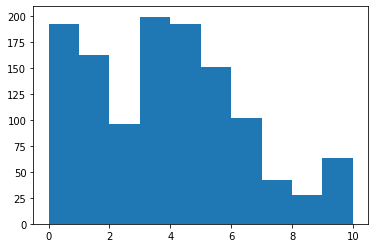

In [4]:
print('x shape', x.shape)
print('y shape', y.shape)
print(SEQ_LEN + 1, INPUT_SIZE)

import matplotlib.pyplot as plt
plt.hist(y)
plt.show()

In [5]:


from keras.callbacks import ModelCheckpoint



model = keras.models.Sequential()
# model.add(keras.Input(shape=(SEQ_LEN + 1, INPUT_SIZE)))
# model.add(layers.SimpleRNN(64, return_sequences=True, activation='relu'))  # hidden cells
# model.add(layers.SimpleRNN(256, return_sequences=False, activation='relu'))
model.add(layers.LSTM(16, activation='relu', return_sequences=False, input_shape=(SEQ_LEN + 1, INPUT_SIZE)))
# model.add(layers.LSTM(32))
model.add(layers.Dense(1))



optim = keras.optimizers.Adam(learning_rate=0.001)
metrics = tf.keras.metrics.MeanSquaredError()
# metrics = tf.keras.metrics.MeanAbsoluteError()
loss = tf.keras.losses.MeanAbsoluteError()


model.compile(loss=loss, optimizer=optim, metrics=metrics)

# checkpoint = ModelCheckpoint('models/', monitor='loss', verbose=1, save_best_only=True, mode='min')
# callbacks_list = [checkpoint]

batch_size = 64
epochs = 300
history = model.fit(x, y, batch_size=batch_size, epochs=epochs, shuffle=True, verbose=2) #validation_split #callbacks=callbacks_list

Epoch 1/300
20/20 - 2s - loss: 2.7154 - mean_squared_error: 11.9921
Epoch 2/300
20/20 - 0s - loss: 2.1112 - mean_squared_error: 6.5154
Epoch 3/300
20/20 - 0s - loss: 2.0726 - mean_squared_error: 6.2238
Epoch 4/300
20/20 - 0s - loss: 2.0623 - mean_squared_error: 6.1844
Epoch 5/300
20/20 - 0s - loss: 2.0492 - mean_squared_error: 6.3237
Epoch 6/300
20/20 - 0s - loss: 2.0235 - mean_squared_error: 6.0523
Epoch 7/300
20/20 - 0s - loss: 2.0181 - mean_squared_error: 6.0413
Epoch 8/300
20/20 - 0s - loss: 2.0067 - mean_squared_error: 6.0751
Epoch 9/300
20/20 - 0s - loss: 1.9822 - mean_squared_error: 6.0078
Epoch 10/300
20/20 - 0s - loss: 1.9272 - mean_squared_error: 5.8839
Epoch 11/300
20/20 - 0s - loss: 1.8913 - mean_squared_error: 5.7882
Epoch 12/300
20/20 - 0s - loss: 1.8463 - mean_squared_error: 5.6903
Epoch 13/300
20/20 - 0s - loss: 1.8121 - mean_squared_error: 5.6098
Epoch 14/300
20/20 - 0s - loss: 1.7713 - mean_squared_error: 5.3730
Epoch 15/300
20/20 - 0s - loss: 1.7592 - mean_squared_er

Epoch 122/300
20/20 - 0s - loss: 1.4675 - mean_squared_error: 4.6117
Epoch 123/300
20/20 - 0s - loss: 1.4444 - mean_squared_error: 4.4732
Epoch 124/300
20/20 - 0s - loss: 1.4413 - mean_squared_error: 4.4326
Epoch 125/300
20/20 - 0s - loss: 1.4375 - mean_squared_error: 4.4139
Epoch 126/300
20/20 - 0s - loss: 1.4201 - mean_squared_error: 4.3432
Epoch 127/300
20/20 - 0s - loss: 1.4312 - mean_squared_error: 4.4087
Epoch 128/300
20/20 - 1s - loss: 1.4286 - mean_squared_error: 4.3831
Epoch 129/300
20/20 - 0s - loss: 1.4134 - mean_squared_error: 4.3078
Epoch 130/300
20/20 - 0s - loss: 1.4019 - mean_squared_error: 4.2690
Epoch 131/300
20/20 - 1s - loss: 1.4325 - mean_squared_error: 4.4614
Epoch 132/300
20/20 - 1s - loss: 1.4068 - mean_squared_error: 4.2999
Epoch 133/300
20/20 - 1s - loss: 1.3913 - mean_squared_error: 4.3270
Epoch 134/300
20/20 - 0s - loss: 1.4019 - mean_squared_error: 4.3119
Epoch 135/300
20/20 - 0s - loss: 1.4007 - mean_squared_error: 4.3831
Epoch 136/300
20/20 - 1s - loss: 1

Epoch 241/300
20/20 - 0s - loss: 1.3031 - mean_squared_error: 3.8123
Epoch 242/300
20/20 - 0s - loss: 1.2121 - mean_squared_error: 3.4544
Epoch 243/300
20/20 - 0s - loss: 1.2025 - mean_squared_error: 3.4357
Epoch 244/300
20/20 - 0s - loss: 1.2064 - mean_squared_error: 3.4290
Epoch 245/300
20/20 - 0s - loss: 1.2277 - mean_squared_error: 3.5168
Epoch 246/300
20/20 - 0s - loss: 1.1672 - mean_squared_error: 3.2363
Epoch 247/300
20/20 - 0s - loss: 1.1676 - mean_squared_error: 3.2628
Epoch 248/300
20/20 - 0s - loss: 1.1591 - mean_squared_error: 3.1858
Epoch 249/300
20/20 - 1s - loss: 1.1985 - mean_squared_error: 3.4189
Epoch 250/300
20/20 - 1s - loss: 1.1821 - mean_squared_error: 3.3524
Epoch 251/300
20/20 - 0s - loss: 1.2055 - mean_squared_error: 3.3513
Epoch 252/300
20/20 - 0s - loss: 1.1274 - mean_squared_error: 3.0246
Epoch 253/300
20/20 - 0s - loss: 1.1705 - mean_squared_error: 3.2539
Epoch 254/300
20/20 - 0s - loss: 1.1479 - mean_squared_error: 3.1877
Epoch 255/300
20/20 - 0s - loss: 1

dict_keys(['loss', 'mean_squared_error'])


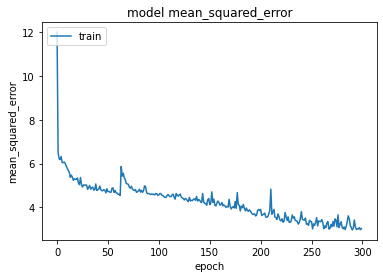

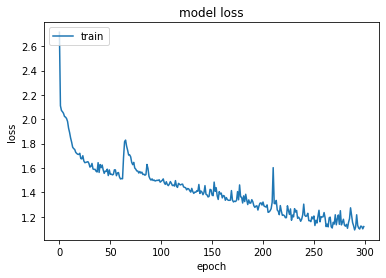

1.091191291809082


In [7]:

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mean_squared_error'][0:999])
# plt.plot(history.history['val_mean_squared_error'][0:999])
plt.title('model mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'][0:999])
# plt.plot(history.history['val_loss'][0:999])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print(min(history.history['loss']))

In [9]:
preds = model.predict(x)
sevens = np.where(np.logical_and(y>=9, y<=10))[0].tolist()
for s in sevens:
    print(s)
    print(preds[s], y[s])

157
[2.9457223] 9.0
159
[3.1517465] 9.0
160
[3.0206225] 9.0
161
[1.8829771] 9.0
162
[2.7248125] 9.0
163
[3.0103414] 9.0
164
[1.7793171] 9.0
330
[7.7301636] 9.2
332
[8.956352] 9.2
334
[9.3752] 9.2
336
[8.874052] 9.2
338
[8.075408] 9.2
343
[8.266046] 9.2
346
[7.906889] 9.2
347
[9.269776] 9.2
348
[8.70065] 9.2
349
[8.859416] 9.2
350
[8.664204] 10.0
353
[8.462522] 9.2
358
[9.707983] 10.0
359
[9.245278] 9.5
361
[7.863187] 9.0
363
[7.8384795] 9.0
364
[6.8369474] 9.0
367
[6.6555367] 9.0
368
[6.4344234] 9.0
369
[7.294071] 9.0
370
[8.193392] 9.0
378
[10.097433] 9.5
632
[4.9068704] 10.0
1100
[5.3792324] 9.0
1103
[4.638776] 9.5
1105
[6.9272857] 9.0
1111
[9.1656685] 9.0
1112
[4.904363] 9.0
1115
[4.9301815] 9.0
1117
[5.1850095] 9.0
1120
[5.4554315] 9.0
1125
[7.9525256] 9.0
1126
[6.5646725] 9.0
1129
[7.862007] 9.0
1131
[8.167464] 9.0
1132
[4.8473735] 9.0
1134
[8.324033] 9.0
1136
[6.77376] 9.0
1160
[7.392591] 9.0
1162
[5.1819477] 10.0
1165
[7.1789527] 9.0
1170
[7.77332] 9.0
1173
[5.662437] 9.0
1178
[

In [ ]:
#model.save('models/fco/lstm16_adam.h5')

In [ ]:
plt.hist(y)
plt.show()

In [10]:
hx, hy = read_raw_data(score_path='labels/ht3_fco_score.xlsx', data_path='labels/ht3_fco_data.csv')
print('x shape', hx.shape)
print('y shape', hy.shape)


all examples: 35


0it [00:00, ?it/s]

x shape (35, 51, 42)
y shape (35,)


In [11]:
preds = model.predict(hx)
for i, p in enumerate(preds):
    print(i, p, hy[i])


0 [0.3814987] 0
1 [0.37412596] 6
2 [0.36362892] 6
3 [0.36390543] 6
4 [0.36578023] 6
5 [0.37269056] 6
6 [0.42744365] 6
7 [0.5690094] 6
8 [0.5681689] 6
9 [0.57868505] 6
10 [0.5675913] 6
11 [0.5698216] 6
12 [0.597695] 6
13 [0.55993617] 6
14 [0.5833882] 6
15 [0.59111845] 6
16 [0.5711087] 6
17 [0.5903202] 6
18 [0.5831411] 6
19 [0.56622124] 6
20 [0.6018683] 6
21 [0.53967404] 6
22 [0.61074376] 6
23 [0.56158876] 6
24 [0.6745647] 6
25 [0.750602] 6
26 [0.7543472] 6
27 [0.81833076] 6
28 [0.6594715] 6
29 [0.7945479] 6
30 [0.83813596] 6
31 [0.7240324] 6
32 [0.5698271] 6
33 [0.7911229] 6
34 [1.197994] 6
